In [1]:

import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os


f:\python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\

In [3]:

# Path model tersimpan
model_path = pathlib.Path("../model/model.keras")

if not model_path.exists():
    raise FileNotFoundError(f"❌ Model tidak ditemukan di: {model_path.resolve()}")
else:
    print(f"✅ Model ditemukan di: {model_path.resolve()}")

# Load model
model = tf.keras.models.load_model(model_path)
print("✅ Model berhasil dimuat!")


✅ Model ditemukan di: E:\DragonEye\model\model.keras
✅ Model berhasil dimuat!


In [4]:

# Path dataset uji / validasi
base_dir = pathlib.Path("../raw_data")

if not base_dir.exists():
    raise FileNotFoundError(f"❌ Folder dataset tidak ditemukan: {base_dir.resolve()}")
else:
    print(f"✅ Dataset ditemukan di: {base_dir.resolve()}")

# Parameter
img_height = 150
img_width = 150
batch_size = 32

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = val_ds.class_names
print("Kelas yang terdeteksi:", class_names)

# Evaluasi performa model di data validasi
loss, acc = model.evaluate(val_ds)
print(f"🎯 Akurasi validasi: {acc*100:.2f}%")


✅ Dataset ditemukan di: E:\DragonEye\raw_data
Found 810 files belonging to 3 classes.
Using 162 files for validation.
Kelas yang terdeteksi: ['Mutu 1', 'Mutu 2', 'Mutu 3']
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 1.0000 - loss: 0.0000e+00
🎯 Akurasi validasi: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
📸 Prediksi kelas: Mutu 3 (99.95%)


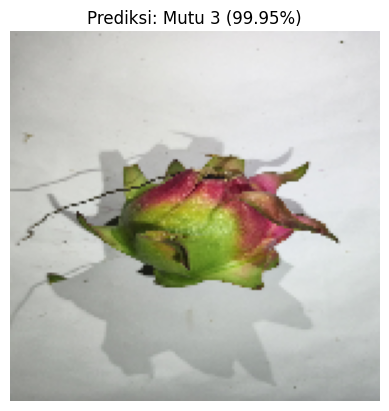

In [8]:

# Uji dengan satu gambar baru
test_image_path = pathlib.Path("../raw_data/Mutu 3/MT3_018.jpg")

if not test_image_path.exists():
    print("⚠️ Gambar uji tidak ditemukan, pastikan path benar.")
else:
    img = image.load_img(test_image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array)
    class_index = np.argmax(pred)
    confidence = np.max(pred)

    print(f"📸 Prediksi kelas: {class_names[class_index]} ({confidence*100:.2f}%)")

    # Tampilkan gambar
    plt.imshow(img)
    plt.title(f"Prediksi: {class_names[class_index]} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()
